# Project overview:--

* We are going to make a model which works on a medical data to predict whether the person has heart disease or not
* Lets see our steps for better prediction:

* Problem Definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

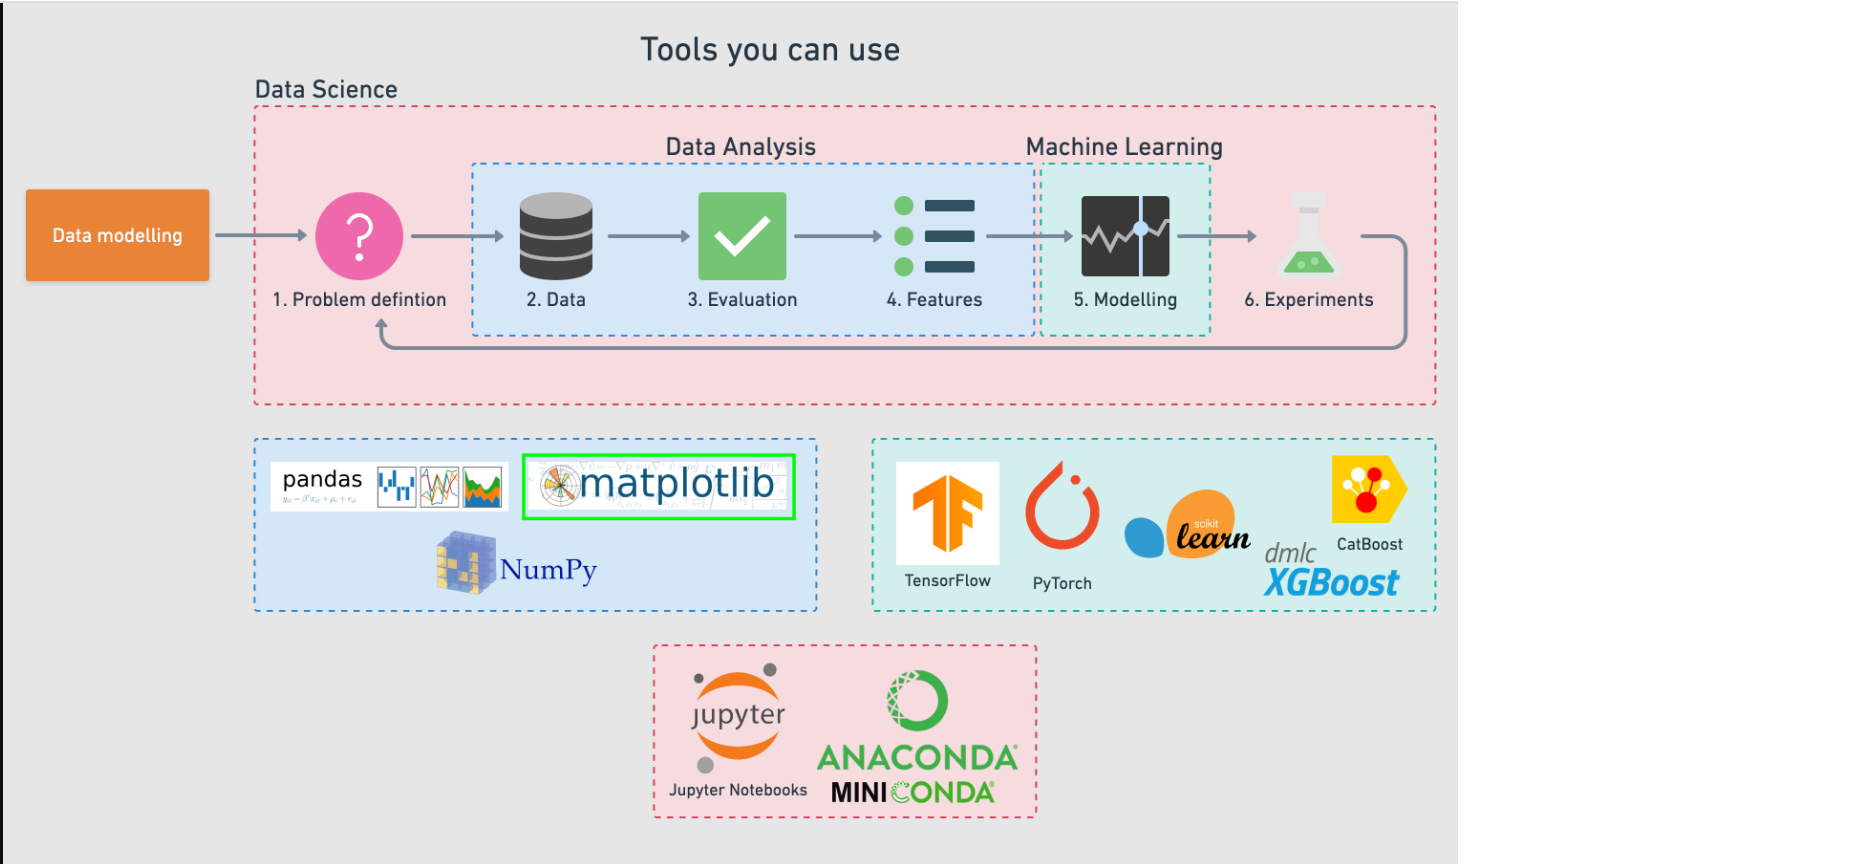

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\kuldeep.garg\Documents\My_learnings\Machine_learning\MLenv\images\6_ml_steps.png',width=1600,height=800)

## 1.`Problem Definition`

#### In this problem we need to predict whether a person have heart disease or not with the help of our model which work on different features provoided in the dataset

##  2.`Data` 

#### We have taken the data from ZTMGgithub profile, the data name is `Heart_Disease.csv`

## 3.`Evaluation`

#### Here we defines what results we have to get to get succeeded:-

#### We need to obtain a accuracy score of `95%` with the help of our model...

## 4.`Features`

#### Features tell us about the data we have. They describe every attribute/feature so that the ML engineer can understand the data and use the model accordingly.
#### You can do this by your own research or by taking help from the subject matter expert(someone who knows the data).

In [2]:
data_dictionary=["""

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

"""]

# `Preparing our Tools`

In [3]:
# Import all the essential modules from their respective libraries

# importing all the EDA(Explanatory data analysis) modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want to plot our graph in this notbook only so 
%matplotlib inline


# import required skleanr models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# importing all the evaluating modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


# `Load Data`

In [4]:
df_hd=pd.read_csv("data/heart-disease.csv")
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration(Exploratory data analysis or EDA)
#### The goal here is to find more about the data and become a subject matter expert on the dataset u're working with 

In [5]:
#lets check for missing values
df_hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df_hd.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(df_hd.target,df_hd.sex)

sex,0,1
target,,
0,24,114
1,72,93


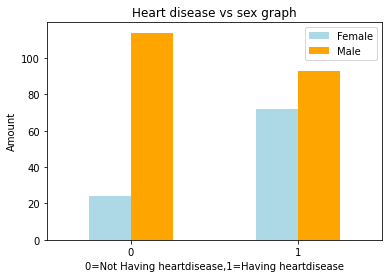

In [9]:
#lets plot this for better visualization

pd.crosstab(df_hd.target,df_hd.sex).plot(kind="bar",color=["lightblue","orange"])

plt.title("Heart disease vs sex graph")
plt.xlabel("0=Not Having heartdisease,1=Having heartdisease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);


In [10]:
df_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# lets check it against chol
df_hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df_hd.chol.value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [13]:
df_hd.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [14]:
df_cp_is_0=df_hd[df_hd["cp"] == 0]

In [15]:
df_cp_is_0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [16]:
pd.crosstab(df_cp_is_0.target,df_cp_is_0.cp)

cp,0
target,
0,104
1,39


In [17]:
df_cp_is_1=df_hd[df_hd["cp"] == 1]

In [18]:
pd.crosstab(df_cp_is_1.target,df_cp_is_1.cp)

cp,1
target,
0,9
1,41


In [19]:
df_cp_is_2=df_hd[df_hd["cp"] == 2]
pd.crosstab(df_cp_is_2.target,df_cp_is_2.cp)

cp,2
target,
0,18
1,69


In [20]:
df_cp_is_3=df_hd[df_hd["cp"] == 3]
pd.crosstab(df_cp_is_3.target,df_cp_is_3.cp)

cp,3
target,
0,7
1,16


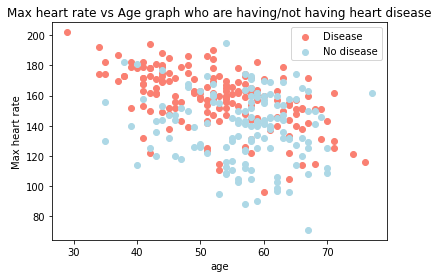

In [21]:
# lets make a graph for age vs Max heart rate for having heart disease or not having heart disease


plt.scatter(df_hd.age[df_hd.target==1],
           df_hd.thalach[df_hd.target==1],
           c="salmon")

plt.scatter(df_hd.age[df_hd.target==0],
           df_hd.thalach[df_hd.target==0],
           c='lightblue')
plt.title("Max heart rate vs Age graph who are having/not having heart disease")
plt.ylabel("Max heart rate")
plt.xlabel("age")
plt.legend(["Disease","No disease"]);


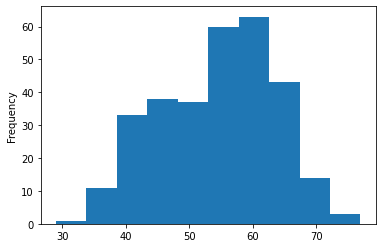

In [22]:
df_hd.age.plot.hist();

# this is cleary a normal disribution graph

In [23]:
# lets check target score for diff chest pains using crosstab


pd.crosstab(df_hd.cp,df_hd.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


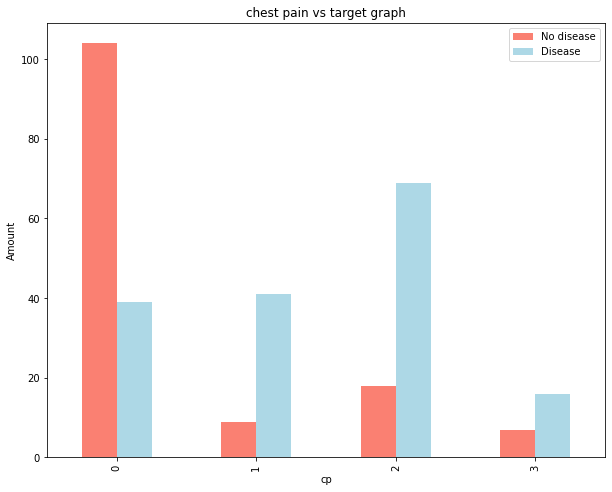

In [24]:
# lets make it more visual
pd.crosstab(df_hd.cp,df_hd.target).plot(kind="bar",
                                       figsize=(10,8),
                                       color=['salmon','lightblue']);

plt.title("chest pain vs target graph")
plt.xlabel("cp")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"]);



In [25]:
# lets try to take help from correlation

df_hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


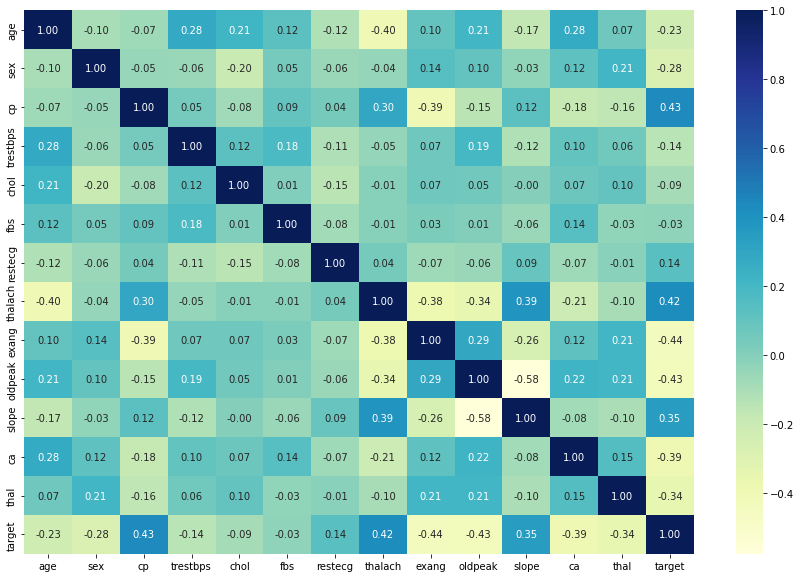

In [26]:
corr_matrix=df_hd.corr()
fig,ax=plt.subplots(figsize=(15,10))

ax=sns.heatmap(corr_matrix,
              cmap='YlGnBu',
              fmt='.2f',
              annot=True)


In [27]:
# lets focus on target column only: If the feature column is +ve then it will effect target with direct propotionality, 
# and if featuer value is -ve then it will effect target with inverse propotionality

#### Enough for data exploration if you aren't satidfied you can do more it is all abt experimentation


# 5. Modelling

In [28]:
df_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
np.random.seed(42)

X=df_hd.drop("target",axis=1)
Y=df_hd['target']


# lets split the data

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# lets take 3 models according to our mode and proceed further with fitting data to them

models={'KNN':KNeighborsClassifier(),
       'Logistic regression':LogisticRegression(),
       'Random forest classifier':RandomForestClassifier()}

In [30]:


def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    
    np.random.seed(42)
    
    model_score={}
    
    for name,model in models.items():
    #     fit the data
        model.fit(x_train,y_train)
    #     check the score
        ms=model.score(x_test,y_test)

        model_score[name]=ms
    return model_score

In [31]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)

C:\Users\kuldeep.garg\Documents\My_learnings\Machine_learning\MLenv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model comparison

In [32]:
model_scores

{'KNN': 0.6885245901639344,
 'Logistic regression': 0.8852459016393442,
 'Random forest classifier': 0.8360655737704918}

<AxesSubplot:>

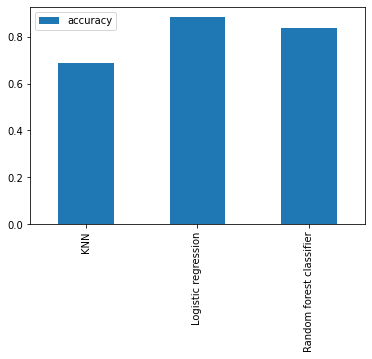

In [33]:
# lets make it more visual

model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

### Now we have created a baseline model, we know its accuracy doesn't met to our requirements so lets look at the following things to make it better

* Hyperparameter tuning
* ROC and AUC curve
* confusion matrix
* classification report
* cross validation
* precision 
* Recall
* F1 Score
* Feature Importance

## Hyperparameter tuning by Hand

In [34]:
# lets tune our KNC by hand

np.random.seed(42)
train_score=[]
test_score=[]

neighbours=np.arange(1,21,1)

for i in neighbours:
    KNN= KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    train_score.append(KNN.score(x_train,y_train))
    test_score.append(KNN.score(x_test,y_test))
    
    

    

In [37]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

The max accuray on test data is:75.41


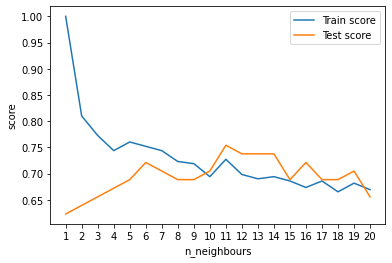

In [38]:
plt.plot(neighbours,train_score,label="Train score")
plt.plot(neighbours,test_score,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("n_neighbours")
plt.ylabel("score")
plt.legend()

print(f"The max accuray on test data is:{max(test_score)*100:.2f}")

# lets tune our rest models with RandomizedSearchCV
we are going to tune :

* LogisticRegression
* RandomForestClassifier

In [39]:
lr_rs_grid={"C":np.logspace(-4,4,20),
           "solver":["liblinear"]}

rf_rs_grid={"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,7,9,11],
           "min_samples_leaf":np.arange(1,20,2),
           "min_samples_split":np.arange(2,20,2)}


lr_rs_model=RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=lr_rs_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)


lr_rs_model.fit(x_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
lr_rs_model.score(x_test,y_test)

0.8852459016393442

In [41]:
lr_rs_model.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
rf_rs_model=RandomizedSearchCV(estimator=RandomForestClassifier(),
                               param_distributions=rf_rs_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)


rf_rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7, 9, 11],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
rf_rs_model.score(x_test,y_test)

0.8688524590163934

In [44]:
rf_rs_model.best_params_

{'n_estimators': 810,
 'min_samples_split': 12,
 'min_samples_leaf': 11,
 'max_depth': None}

# Lets tune our model with GridSearchCV also



In [46]:
lr_gs_grid={"C":np.logspace(-4,4,20),
           "solver":["liblinear"]}

rf_gs_grid={"n_estimators":np.arange(1,100,10),
           "max_depth":[None,3],
           "min_samples_split":np.arange(2,4,6),
           "min_samples_leaf":np.arange(1,3,7)}



In [47]:
lr_gr_model=GridSearchCV(estimator=LogisticRegression(),
                        param_grid=lr_gs_grid,
                        cv=5,
                        verbose=True)

lr_gr_model.fit(x_train,y_train)
lr_gr_model.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

In [48]:
rf_gs_model=GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid=rf_gs_grid,
                        cv=5,
                        verbose=True)

rf_gs_model.fit(x_train,y_train)
rf_gs_model.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

# evaluating our tuned model,beyond accuracy

* ROC Curve
* AUC curve
* confusion matrix
* classification report 
* precision 
* Recall
* f1 score 

In [49]:
y_preds=lr_gr_model.predict(x_test)

In [50]:
y_preds,y_test

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64)

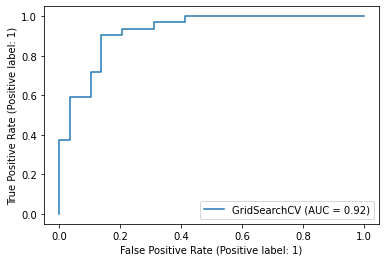

In [51]:
# lets plot ROC curve on logistic regression model
plot_roc_curve(lr_gr_model,x_test,y_test)

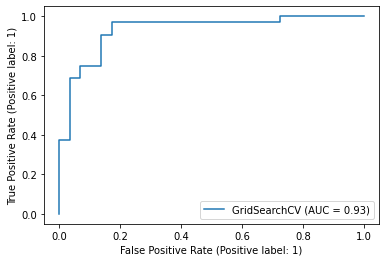

In [52]:
# lets plot our ROC curve on RandomForestClassifier
plot_roc_curve(rf_gs_model,x_test,y_test)

# Conf matrix

In [53]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


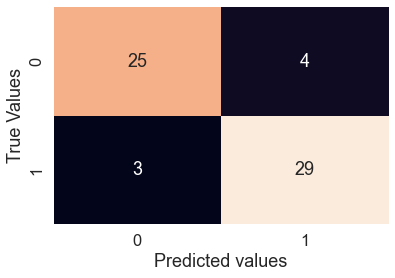

In [54]:
# lets plot our confusion matrix using seaborn heatmap
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using seaborn heatmap 
    """
    fig,ax=plt.subplots()
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    
    plt.xlabel("Predicted values")
    plt.ylabel("True Values")

    
plot_conf_mat(y_test,y_preds) 


In [55]:
# lets make evaluation using classification report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [56]:
# lets check diff evaluating parameters using cross_val_score
lr_gr_model.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [79]:
clf=LogisticRegression(C=0.23357214690901212,solver="liblinear")

In [80]:
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [81]:
cv_pre=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [82]:
cv_rec=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_rec

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [83]:
cv_f1=cross_val_score(clf,X,Y,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [84]:
cv_metrics={"accuracy":cv_acc,
           "Precision":cv_pre,
           "Recall":cv_rec,
           "F1 Score":cv_f1}

In [63]:
cv_metric=pd.DataFrame(cv_metrics)

<AxesSubplot:>

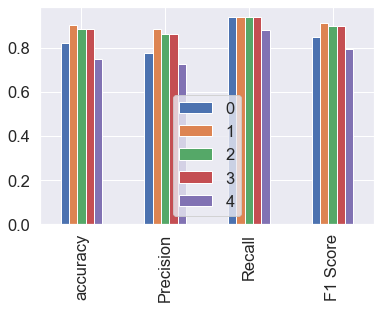

In [64]:
cv_metric.T.plot.bar()

In [65]:
# graph of their mean values

cv_mean=pd.DataFrame({"accuracy":np.mean(cv_acc),
           "Precision":np.mean(cv_pre),
           "Recall":np.mean(cv_rec),
           "F1 Score":np.mean(cv_f1)},index=[0])

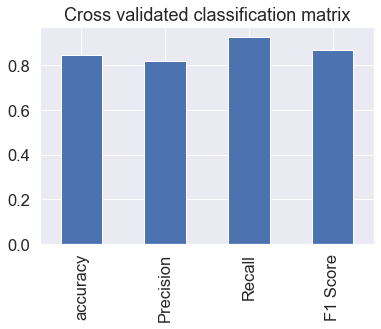

In [66]:
cv_mean.T.plot.bar(title="Cross validated classification matrix",
                  legend=None);

## Feature Importance

#### Here we learn how our each feature is responsible or how much and in what way our each feature is contributing in the prediction of target values

In [67]:
df_hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [68]:
clf=LogisticRegression(C=0.23357214690901212,solver="liblinear")

clf.fit(x_train,y_train)

clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490196,  0.02472938, -0.63120405, -0.57590944,
         0.47095136, -0.65165348, -0.69984207]])

In [69]:

feature_dict=dict(zip(df_hd.columns,list(clf.coef_[0])))
feature_dict

feature_dict_df=pd.DataFrame(feature_dict,index=[0])

<AxesSubplot:title={'center':'Feature Importance'}>

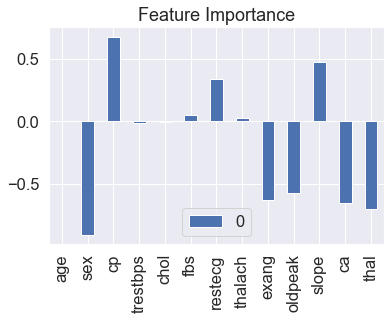

In [70]:
feature_dict_df.T.plot.bar(title="Feature Importance")

In [71]:
# Now we can see visually how our every feature is responsible for predicting the target values
pd.crosstab(df_hd.slope,df_hd.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation

In [75]:
y_preds=rf_gs_model.predict(x_test)

In [76]:
print(confusion_matrix(y_test,y_preds))

[[24  5]
 [ 3 29]]


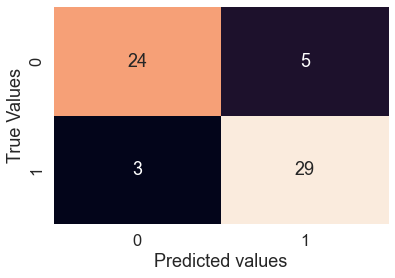

In [78]:
plot_conf_mat(y_test,y_preds)